In [42]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, model_selection, metrics

In [3]:
# Importing the dataset

df = pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


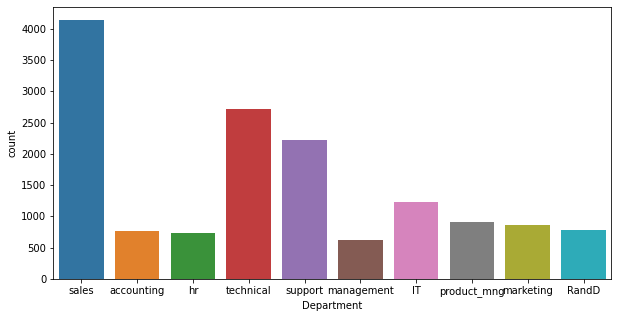

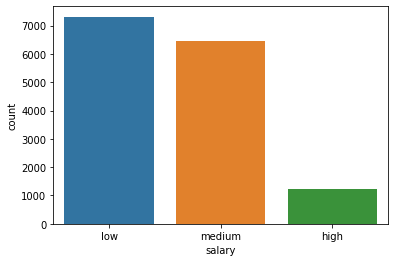

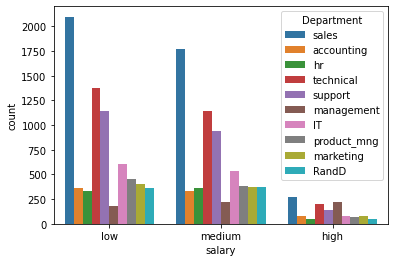

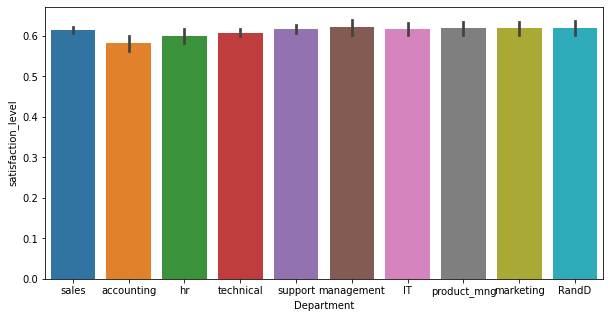

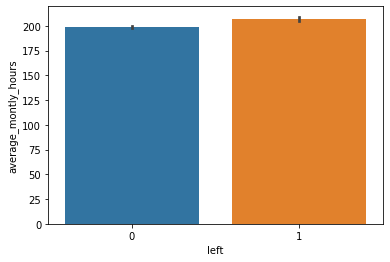

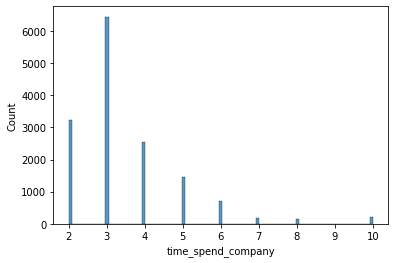

In [25]:
# Analyzing the data

plt.figure(figsize = (10, 5))
sns.countplot(x = "Department", data = df)
plt.show()

sns.countplot(x = "salary", data = df)
plt.show()

sns.countplot(x = "salary", hue = "Department", data = df)
plt.show()

plt.figure(figsize = (10, 5))
sns.barplot(x = "Department", y = "satisfaction_level", data = df)
plt.show()

sns.barplot(x = "left", y = "average_montly_hours", data = df)
plt.show()

sns.histplot(x = "time_spend_company", data = df)
plt.show()

In [33]:
# Data Preprocessing

df = pd.read_csv("HR.csv")

dept = pd.get_dummies(df['Department'])
sal = pd.get_dummies(df['salary'])
df = pd.concat([df, dept, sal], axis = 1)
df.drop(['sales', 'low', 'salary', 'Department'], axis = 1, inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical,high,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Splitting the data into training and testing data

X = df.drop('left', axis = 1).values
y = df['left']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [38]:
# Fitting the model

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Making predictions

y_predicted = model.predict(X_test)

In [46]:
# Checking the accuracy of the model and goodness and fit

print(model.score(X_test, y_test))

print(metrics.r2_score(y_test, y_predicted))

print(metrics.classification_report(y_test, y_predicted))

0.983
0.9061712919722488
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2287
           1       0.95      0.97      0.96       713

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



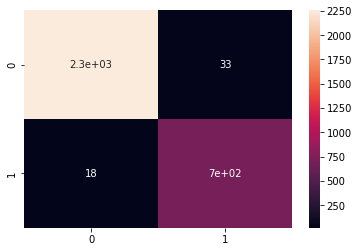

In [47]:
# Analyzing through heatmap

sns.heatmap(metrics.confusion_matrix(y_test, y_predicted), annot = True)
plt.show()